In [ ]:
import torch as pt
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
pt.manual_seed(1);

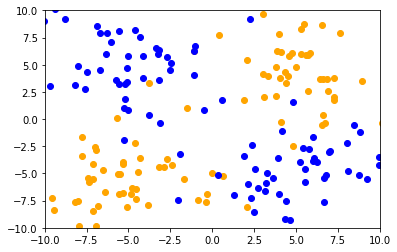

In [ ]:
NUM = 100

#X spam data points 

#lower left
Xs1 = pt.normal(0, 3, [NUM // 2, 2]) - 5
#upper right
Xs2 = pt.normal(0, 3, [NUM // 2, 2]) + 5

#100 spam data points
Xs = pt.cat([Xs1, Xs2])


#X not spam data points
#upper left
Xns1 = pt.normal(0, 3, [NUM // 2, 2]) + 5
Xns1[:, 1] = Xns1[:, 1] - 10

#lower right
Xns2 = pt.normal(0, 3, [NUM // 2, 2]) - 5
Xns2[:, 1] = Xns2[:, 1] + 10

#100 not spam data points
Xns = pt.cat([Xns1, Xns2])

#200 data points, 100 spam, 100 not spam
X = pt.cat([Xs, Xns])

plt.scatter(X[:NUM, 0], X[:NUM, 1], color = 'orange');

plt.scatter(X[NUM:, 0], X[NUM:, 1], color = 'blue');

plt.xlim([-10, 10])
plt.ylim([-10, 10]);

In [ ]:
# #spam = 1, not spam = 0
y = pt.cat( ( pt.ones(NUM).to(int), pt.zeros(NUM).to(int)), dim = 0 )
y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model = nn.Sequential(
  nn.Linear(2, 3),
  nn.ReLU(),
  nn.Linear(3, 2),
  nn.ReLU(),
  nn.LogSoftmax(dim = 1)
)

def forward(X):
  return model(X)

def loss(y_pred, y):
  return pt.nn.functional.nll_loss(y_pred, y)

def metric(y_pred, y):
  return (1 / len(y)) * ((y_pred.argmax(dim = 1) == y).sum())

y_pred = model(X)
loss(y_pred, y), metric(y_pred, y)

optimizer = pt.optim.AdamW(model.parameters())

In [ ]:
for i in range(10000):
  y_pred = forward(X)
  xe = loss(y_pred, y)
  accuracy = metric(y_pred, y)
  xe.backward()
  if i % 100 == 0:
    print("Loss: ", xe, " Accuracy ", accuracy.data.item())#, " Grads ", model.parameters())

  optimizer.step()
  optimizer.zero_grad()

Loss:  tensor(0.8056, grad_fn=<NllLossBackward>)  Accuracy  0.5
Loss:  tensor(0.6238, grad_fn=<NllLossBackward>)  Accuracy  0.574999988079071
Loss:  tensor(0.5173, grad_fn=<NllLossBackward>)  Accuracy  0.8349999785423279
Loss:  tensor(0.4546, grad_fn=<NllLossBackward>)  Accuracy  0.824999988079071
Loss:  tensor(0.4149, grad_fn=<NllLossBackward>)  Accuracy  0.8399999737739563
Loss:  tensor(0.3847, grad_fn=<NllLossBackward>)  Accuracy  0.8449999690055847
Loss:  tensor(0.3635, grad_fn=<NllLossBackward>)  Accuracy  0.8499999642372131
Loss:  tensor(0.3477, grad_fn=<NllLossBackward>)  Accuracy  0.8549999594688416
Loss:  tensor(0.3336, grad_fn=<NllLossBackward>)  Accuracy  0.85999995470047
Loss:  tensor(0.3208, grad_fn=<NllLossBackward>)  Accuracy  0.8650000095367432
Loss:  tensor(0.3097, grad_fn=<NllLossBackward>)  Accuracy  0.8799999952316284
Loss:  tensor(0.3015, grad_fn=<NllLossBackward>)  Accuracy  0.8849999904632568
Loss:  tensor(0.2940, grad_fn=<NllLossBackward>)  Accuracy  0.889999985

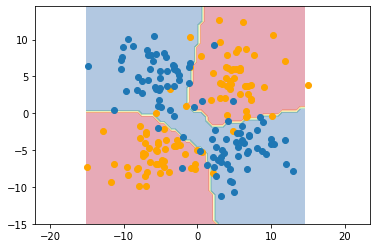

In [ ]:
import numpy as np
x_min, x_max, y_min, y_max, step = -15., 15, -15., 15., 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                    np.arange(y_min, y_max, step))

Xg = np.hstack( (xx.ravel()[:, None], yy.ravel()[:, None]) )


X_test = pt.from_numpy(Xg).to(pt.float)
y_test = forward(X_test).argmax(dim = 1).detach().numpy()

Z = -1 * y_test.reshape(xx.shape)

fig = plt.figure()
plt.axis("equal")
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4);
plt.scatter(X[:NUM, 0], X[:NUM, 1], color = 'orange');
plt.scatter(X[NUM:, 0], X[NUM:, 1]);

Copyright 2021 CounterFactual.AI LLC. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.